#  Analyse du Sommeil et du Mode de Vie

Ce projet analyse les liens entre :
- la **durée du sommeil**
- le **niveau de stress**
- l’**activité physique**
- les **troubles du sommeil**
- l’**âge** et le **genre**

 Objectif : Comprendre quels facteurs influencent la **qualité du sommeil**.


##  Importation des librairies


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Exploration et analyse descriptive

In [96]:
lifestyle=pd.read_csv("../data/Sleep_health_and_lifestyle_dataset.csv")

In [97]:
lifestyle

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


##  Exploration des données (EDA)

In [98]:
lifestyle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [99]:

mean_sleep_duration=np.mean(lifestyle["Sleep Duration"].to_numpy())
    

In [100]:
sum_sleep_duration=np.sum(lifestyle["Sleep Duration"].to_numpy())

In [101]:
mean_sleep_duration

7.132085561497325

In [102]:
mean_age=np.mean(lifestyle["Age"].to_numpy())

In [103]:
mean_age

42.18449197860963

In [104]:
data=lifestyle.groupby("Age")["Gender"].value_counts()

In [105]:
data

Age  Gender
27   Male       1
28   Male       5
29   Male      11
     Female     2
30   Male      11
     Female     2
31   Male      17
     Female     1
32   Male      17
33   Male      11
     Female     2
34   Female     2
35   Male      11
     Female     1
36   Female    10
     Male       2
37   Female    15
     Male       5
38   Male      11
     Female     9
39   Male      12
     Female     3
40   Female     2
     Male       2
41   Male      12
42   Male       7
     Female     2
43   Male      31
     Female     3
44   Male      19
     Female    11
45   Female    14
48   Male       2
     Female     1
49   Female     9
     Male       2
50   Female    20
51   Female     8
52   Female     9
53   Female    17
54   Female     7
55   Female     2
56   Female     2
57   Female     9
58   Female     6
59   Female    16
Name: count, dtype: int64

In [106]:
hours_gender = lifestyle.groupby("Age")


In [107]:
hours_gender.count()

,Person ID,Gender,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Age,,,,,,,,,,,,
27,1,1,1,1,1,1,1,1,1,1,1,0
28,5,5,5,5,5,5,5,5,5,5,5,3
29,13,13,13,13,13,13,13,13,13,13,13,4
30,13,13,13,13,13,13,13,13,13,13,13,2
31,18,18,18,18,18,18,18,18,18,18,18,1
32,17,17,17,17,17,17,17,17,17,17,17,0
33,13,13,13,13,13,13,13,13,13,13,13,1
34,2,2,2,2,2,2,2,2,2,2,2,2
35,12,12,12,12,12,12,12,12,12,12,12,1


In [108]:
   
hours_gender=dict()
for age,group in hours_gender:
    hours_gender[age]=sum(group["Sleep Duration"])



In [109]:
hours_gender

{}

In [110]:
data1=lifestyle["Gender"].value_counts()

In [111]:
lifestyle.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [112]:
type(data1)

pandas.core.series.Series

##  Visualisations exploratoires


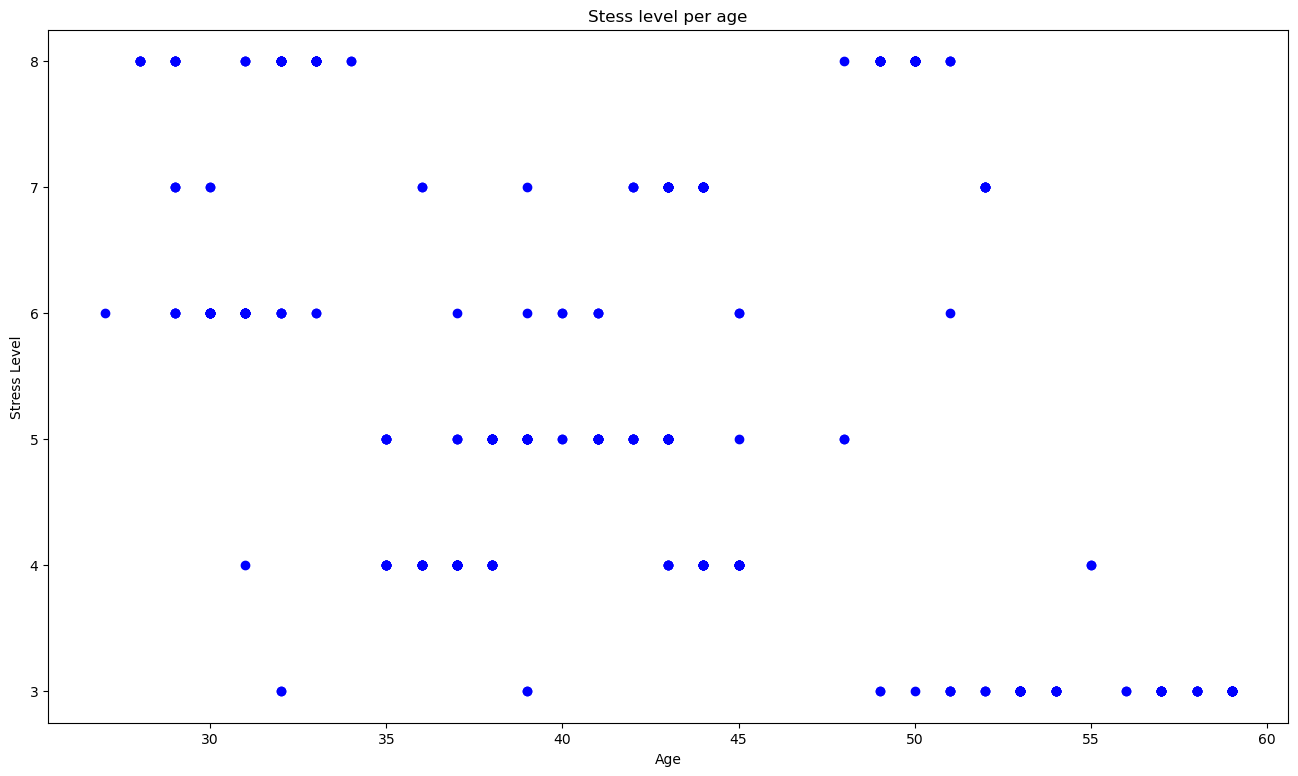

In [113]:
x = lifestyle["Age"].tolist()
y = lifestyle["Stress Level"].tolist()
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x,y, color='blue', marker="o", label='Points')
plt.xlabel("Age")
plt.ylabel("Stress Level")
plt.title("Stess level per age")
plt.savefig("../outputs/graphs/age_vs_stress.png")
plt.show()
plt.grid=True

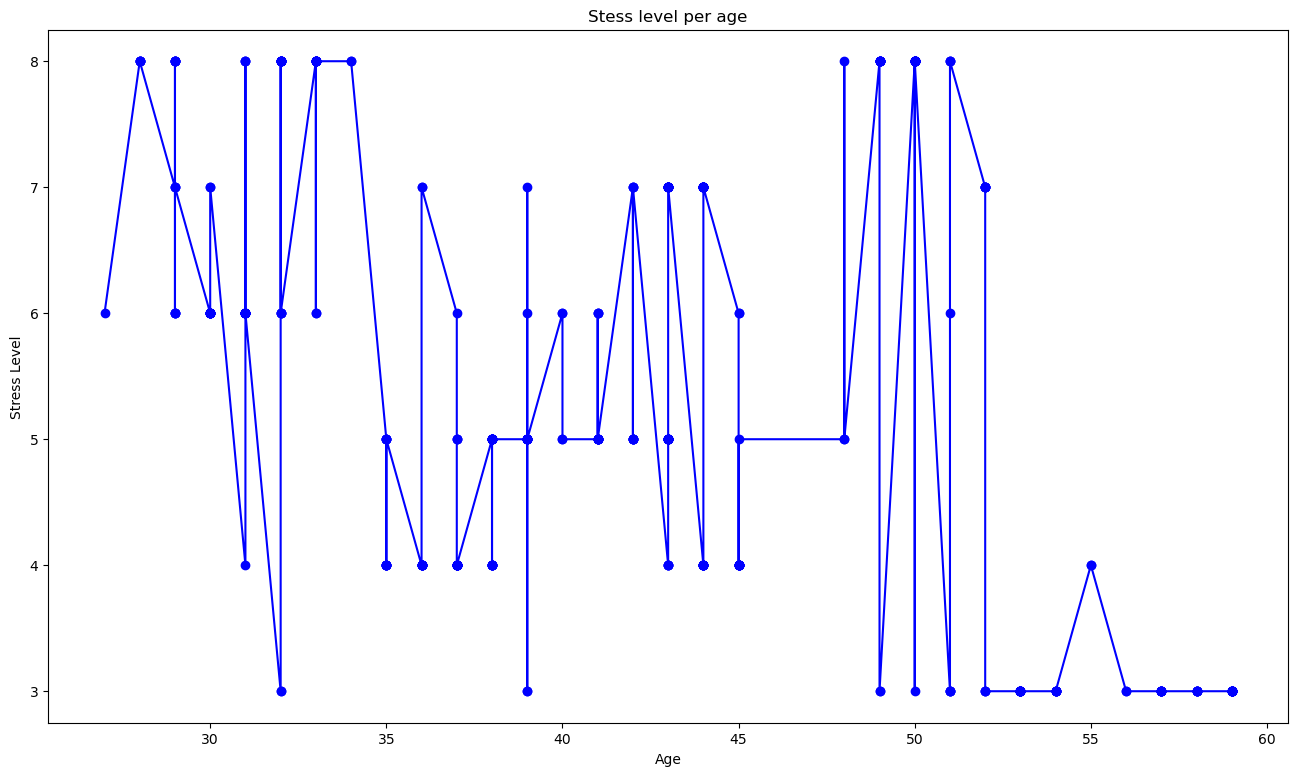

In [114]:
x = lifestyle["Age"].tolist()
y = lifestyle["Stress Level"].tolist()
plt.rcParams["figure.figsize"]=[16,9]
plt.plot(x,y, color='blue', marker="o", label='Points')
plt.xlabel("Age")
plt.ylabel("Stress Level")
plt.title("Stess level per age")
plt.show()

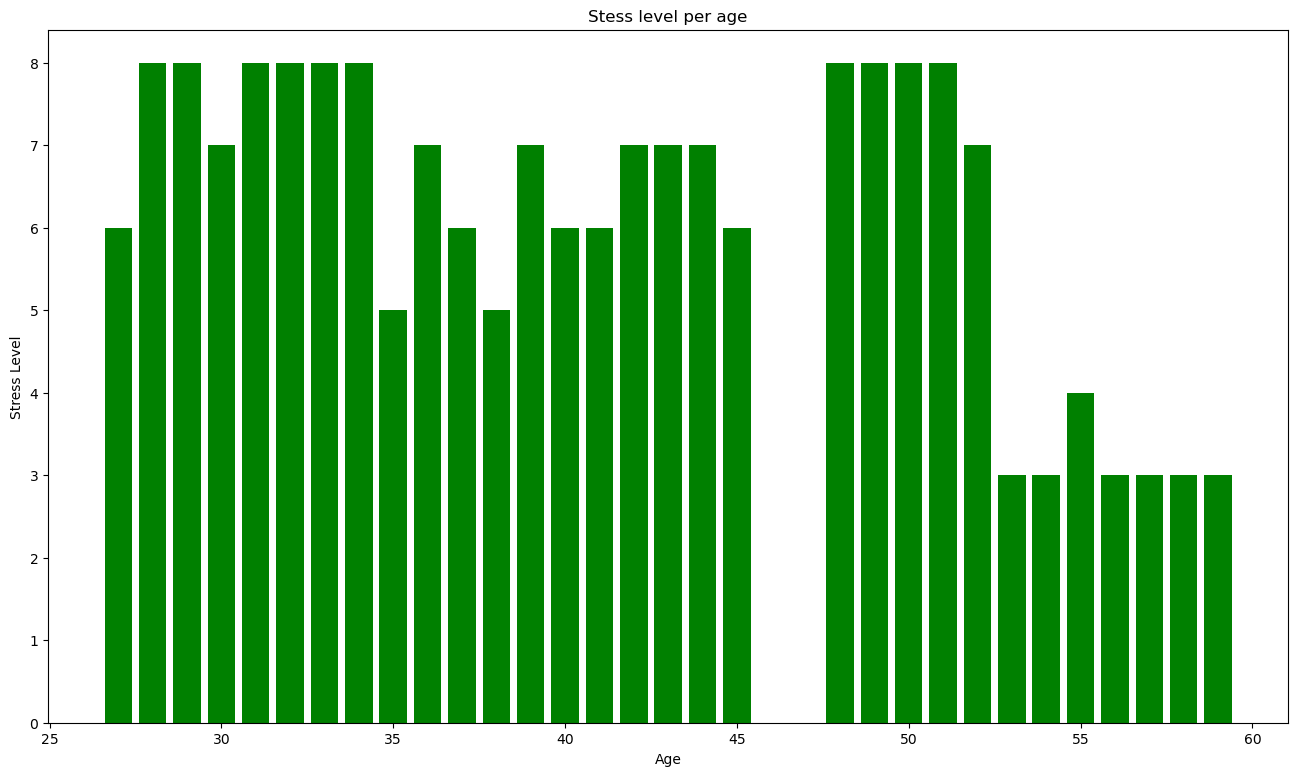

In [115]:
x = lifestyle["Age"].tolist()
y = lifestyle["Stress Level"].tolist()
plt.rcParams["figure.figsize"]=[16,9]
plt.bar(x,y, color='green')
plt.xlabel("Age")
plt.ylabel("Stress Level")
plt.title("Stess level per age")
plt.show()

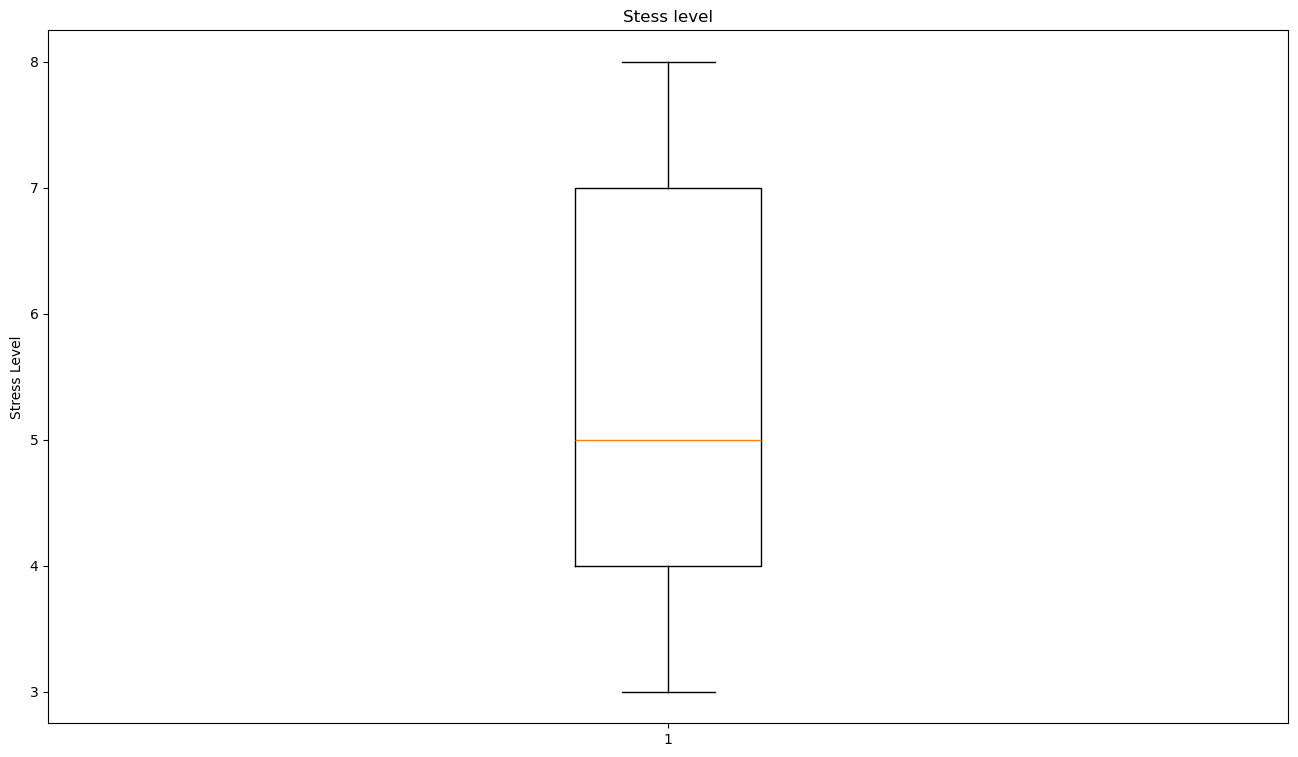

In [116]:
plt.title("Stess level")
y = lifestyle["Stress Level"].tolist()
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(y)
plt.ylabel("Stress Level")
plt.show()

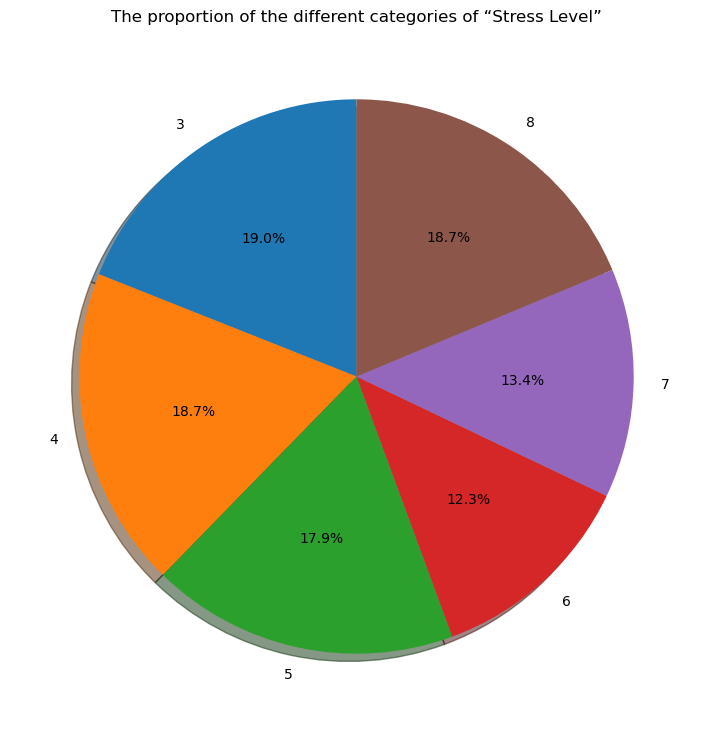

In [117]:
stress_group=lifestyle.groupby("Stress Level").size()
x = stress_group.values
labels=stress_group.index
plt.rcParams["figure.figsize"]=[16,9]
plt.pie(x, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("The proportion of the different categories of “Stress Level”")
plt.savefig("../outputs/graphs/stress_level_distribution.png")
plt.show()

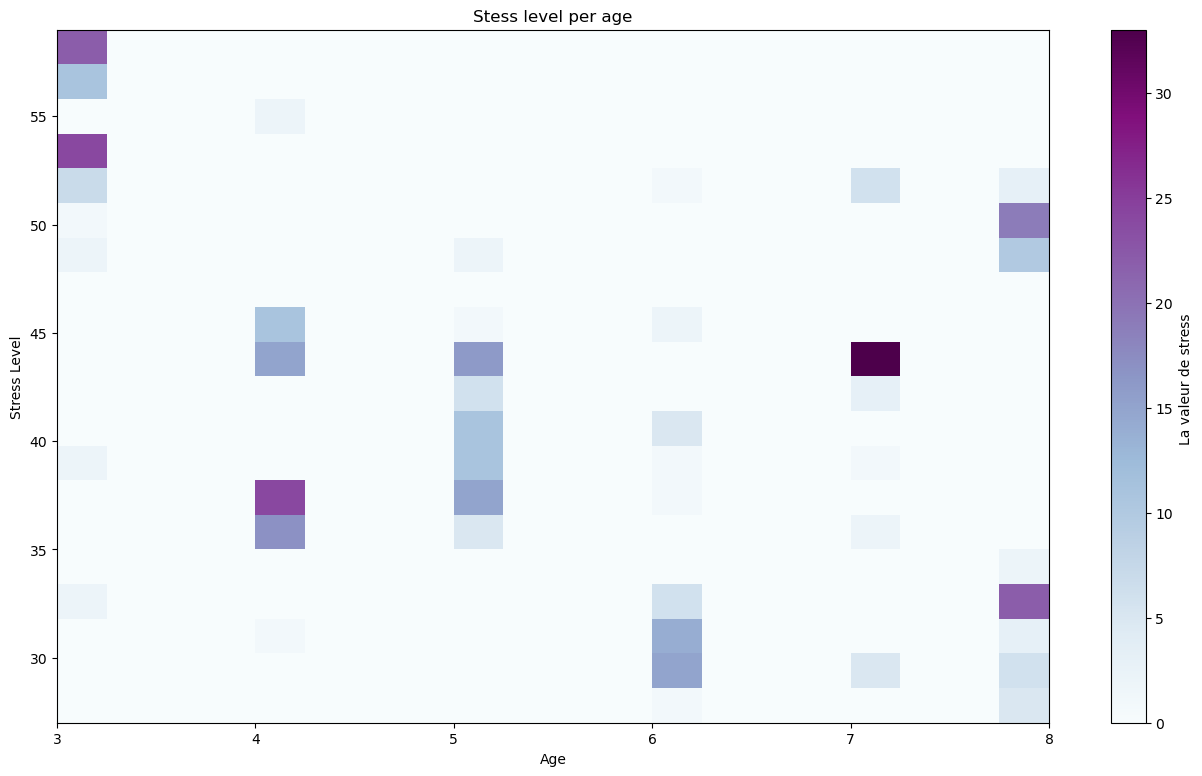

In [118]:
stress_group=lifestyle["Stress Level"]
age_group=lifestyle["Age"]
labels=stress_group.index
plt.rcParams["figure.figsize"]=[16,9]
plt.hist2d(stress_group,age_group, bins=[20,20],cmap="BuPu")
plt.colorbar(label="La valeur de stress ")
plt.xlabel("Age")
plt.ylabel("Stress Level")
plt.title("Stess level per age")
plt.show()

/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/4157385370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Gender", y="Heart Rate", data=lifestyle, palette="pastel")


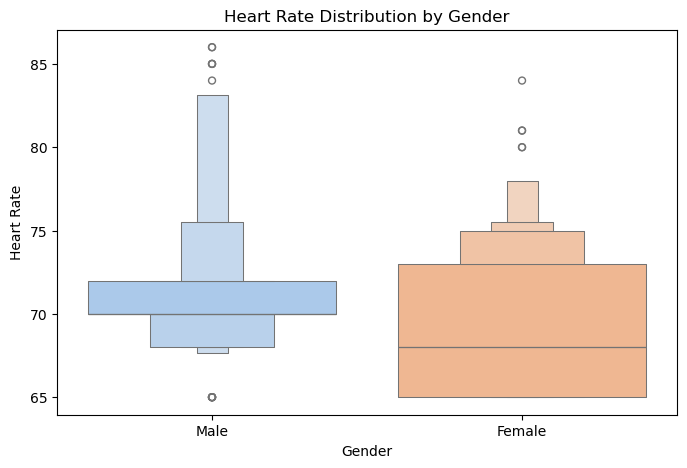

In [119]:
plt.figure(figsize=(8,5))
sns.boxenplot(x="Gender", y="Heart Rate", data=lifestyle, palette="pastel")
plt.title("Heart Rate Distribution by Gender")
plt.savefig("../outputs/graphs/heart_rate_gender.png")
plt.show()

Text(0.5, 1.0, 'Heart rate per gender')

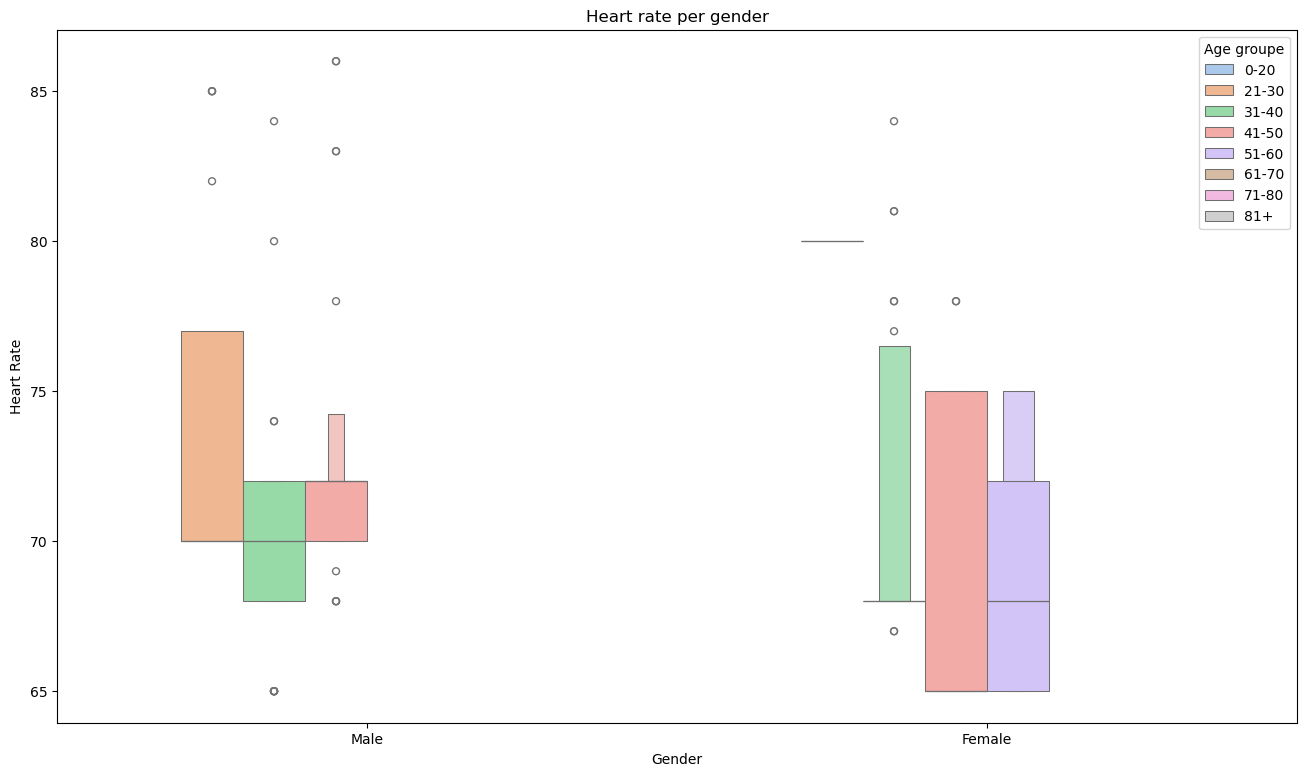

In [120]:
bins = [0,20,30,40,50,60,70,80,100]
labels=["0-20","21-30","31-40","41-50","51-60","61-70","71-80","81+"]
lifestyle["Age groupe"]= pd.cut(lifestyle["Age"], bins=bins, labels=labels, right=False)
sns.boxenplot(x="Gender", y="Heart Rate", hue="Age groupe",data=lifestyle, palette="pastel")
plt.title("Heart rate per gender")



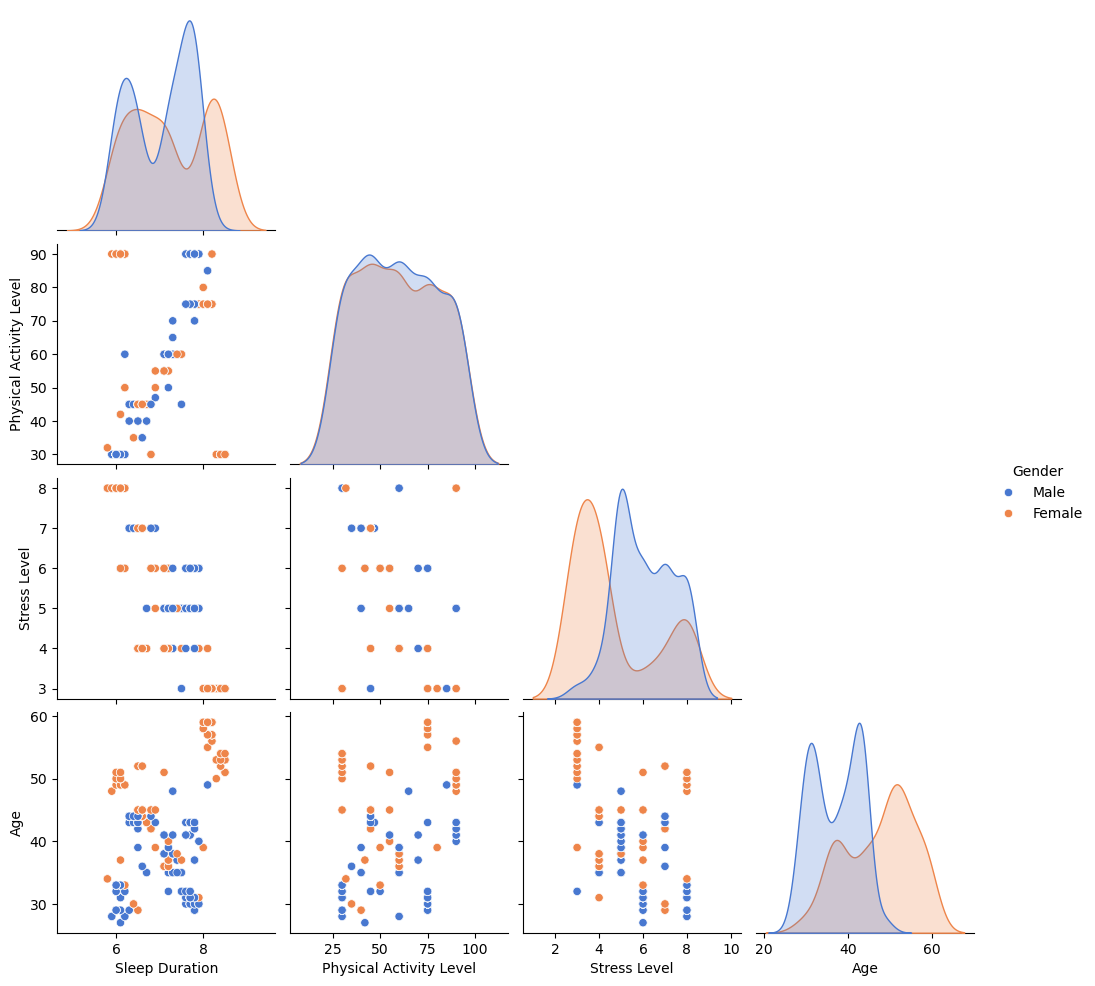

In [121]:

sns.pairplot(
    lifestyle[["Sleep Duration", "Physical Activity Level", "Stress Level", "Age", "Gender"]],
    hue="Gender",
    corner=True,
    palette="muted"
)
plt.show()


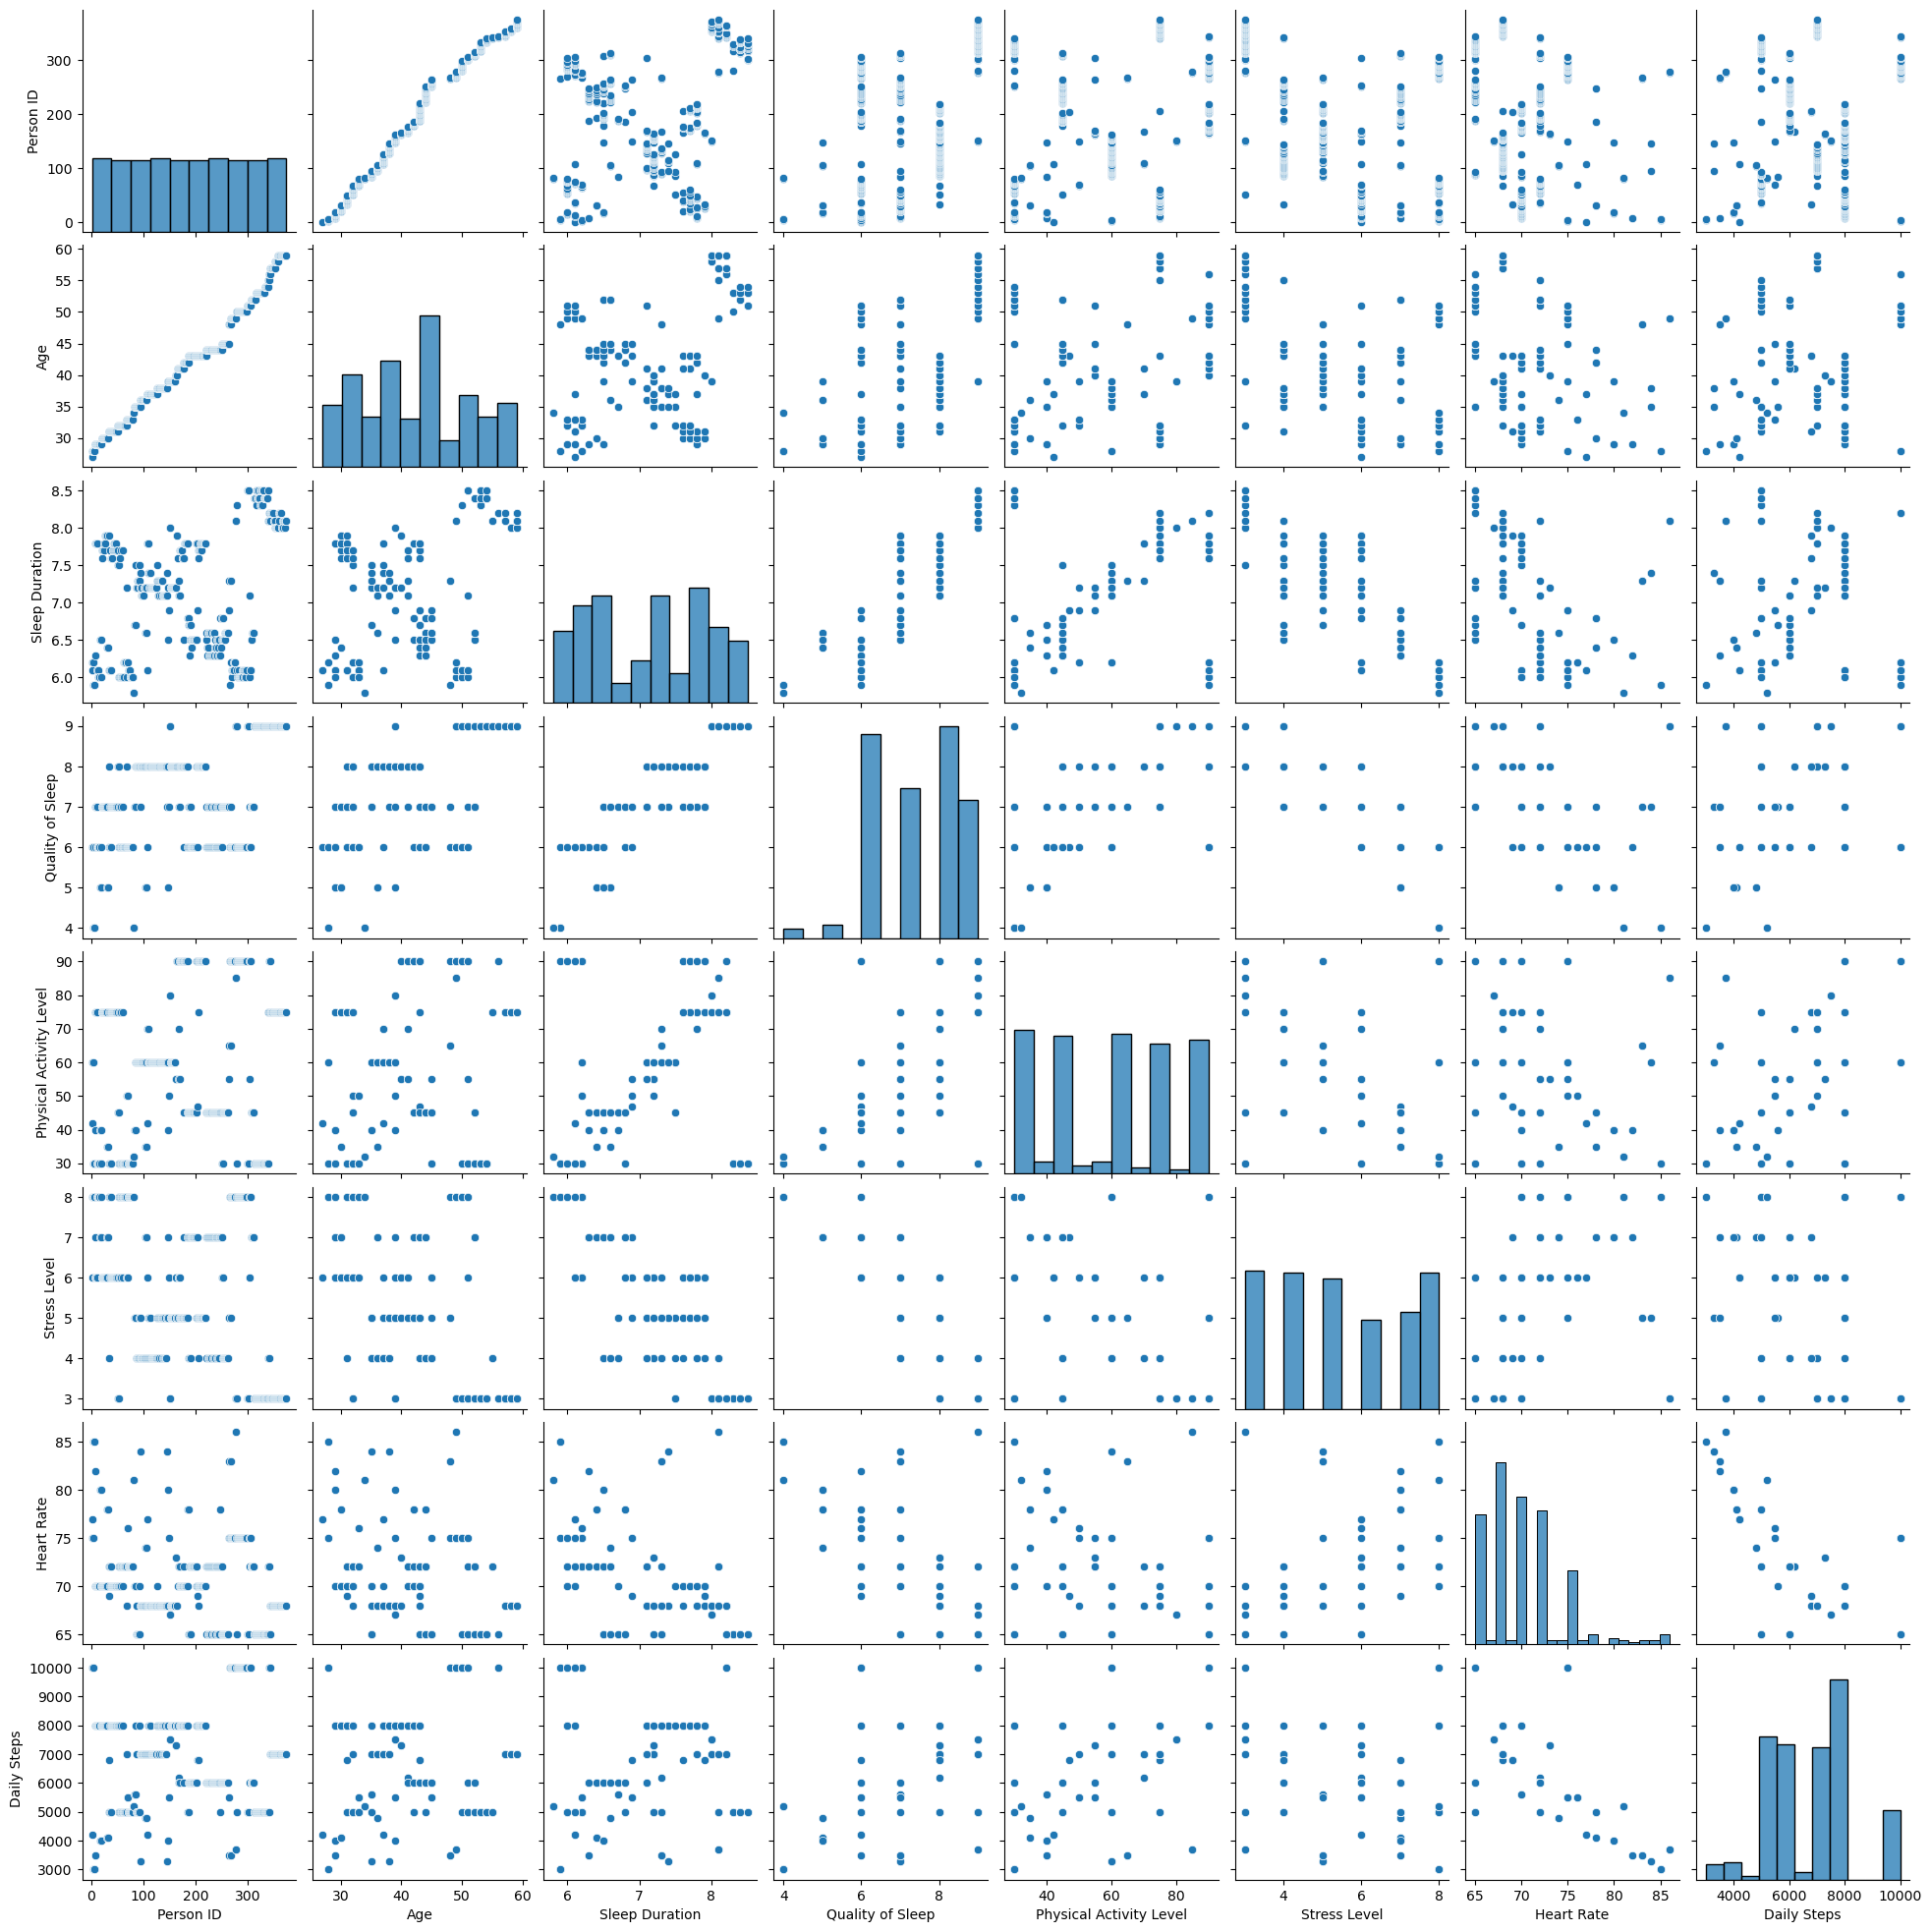

In [122]:
sns.pairplot(lifestyle)

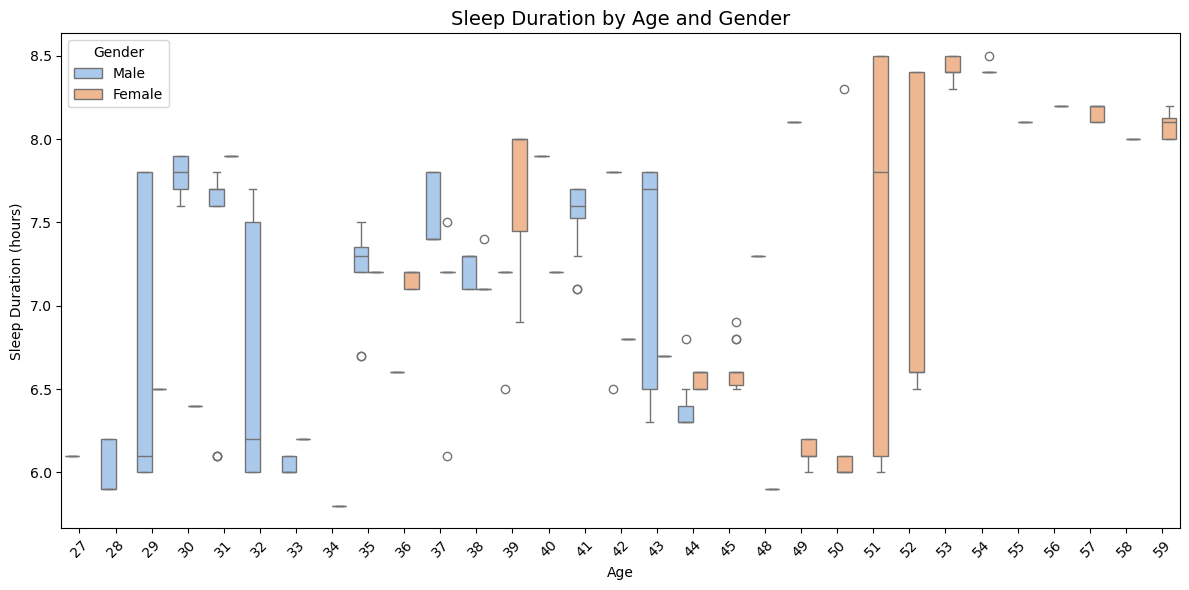

In [123]:
plt.figure(figsize=(12,6))
sns.boxplot(data=lifestyle, x="Age", y="Sleep Duration", hue="Gender", palette="pastel")
plt.title("Sleep Duration by Age and Gender", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Sleep Duration (hours)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


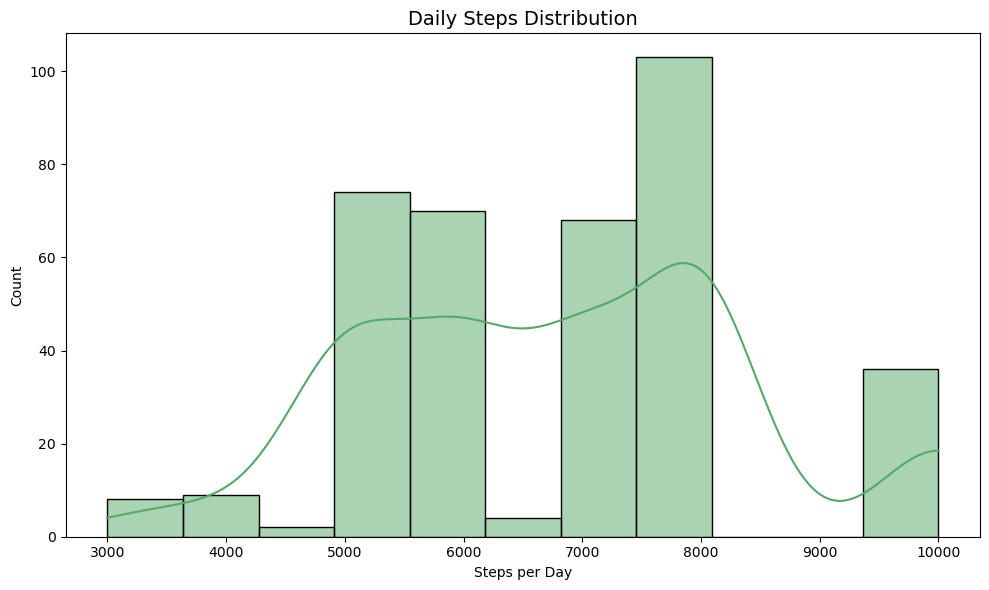

In [124]:
plt.figure(figsize=(10,6))
sns.histplot(lifestyle["Daily Steps"], kde=True, color="#55A868")
plt.title("Daily Steps Distribution", fontsize=14)
plt.xlabel("Steps per Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/225872246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=lifestyle, x="BMI Category", y="Age", palette="pastel")


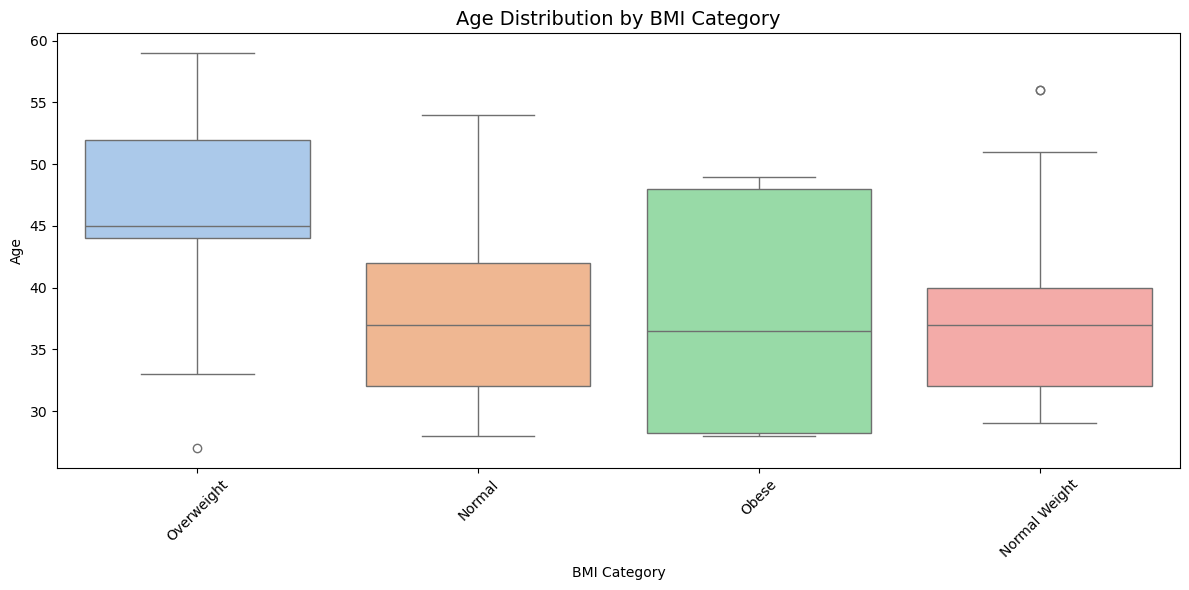

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(data=lifestyle, x="BMI Category", y="Age", palette="pastel")
plt.title("Age Distribution by BMI Category", fontsize=14)
plt.xlabel("BMI Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/graphs/bmi_vs_age.png")
plt.show()



/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/247763301.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=lifestyle["Age"],y=lifestyle["Heart Rate"] ,cmap="seismic")


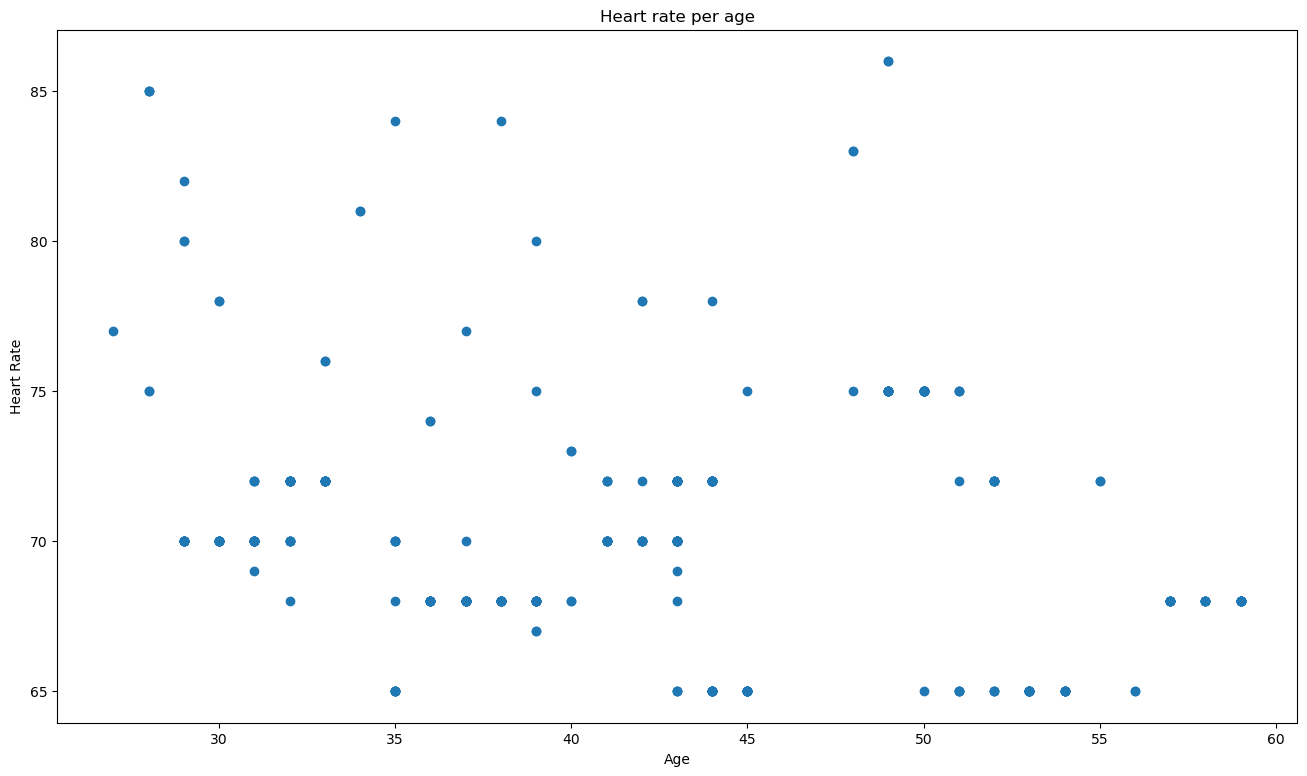

In [126]:
plt.rcParams["figure.figsize"]=[16,9]
plt.title("Heart rate per age")
plt.scatter(x=lifestyle["Age"],y=lifestyle["Heart Rate"] ,cmap="seismic")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.show()

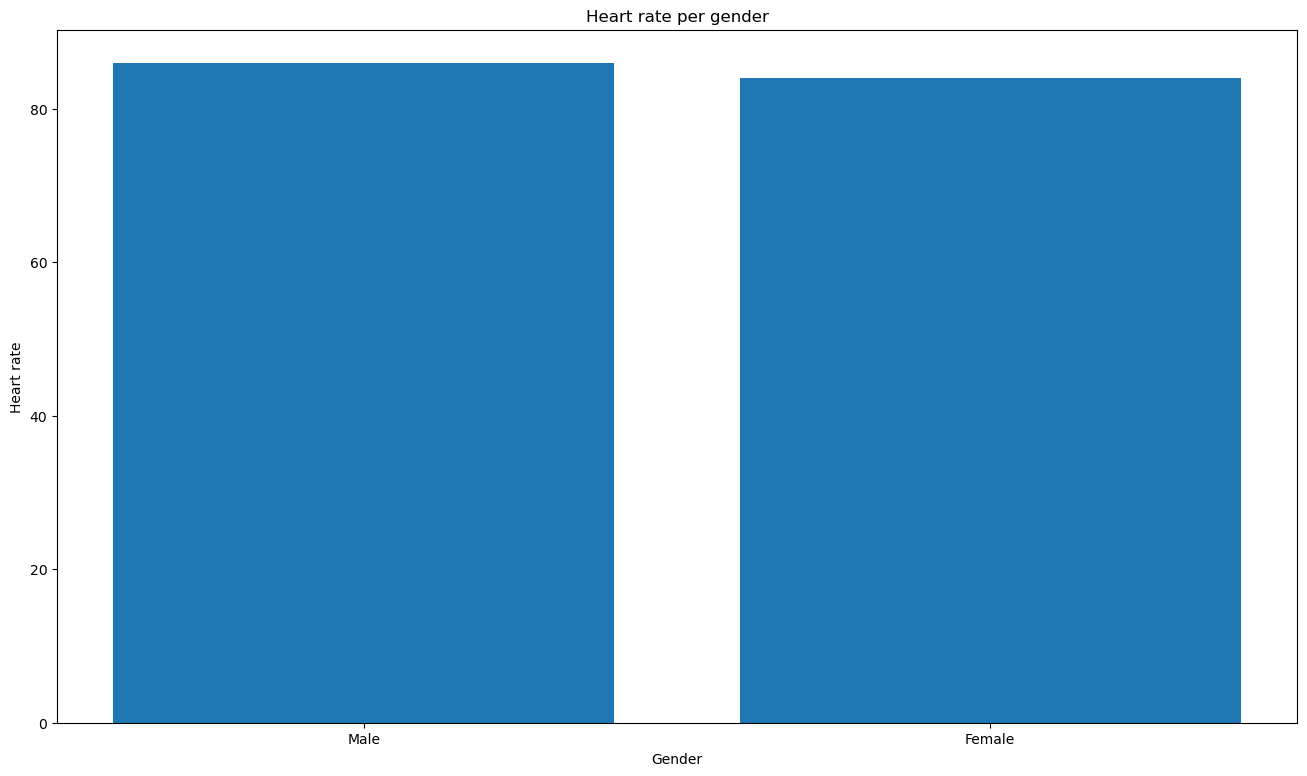

In [127]:
plt.rcParams["figure.figsize"]=[16,9]
plt.title("Heart rate per gender")
plt.xlabel("Gender")
plt.ylabel("Heart rate")
plt.bar(x=lifestyle["Gender"],height=lifestyle["Heart Rate"] )
plt.show()

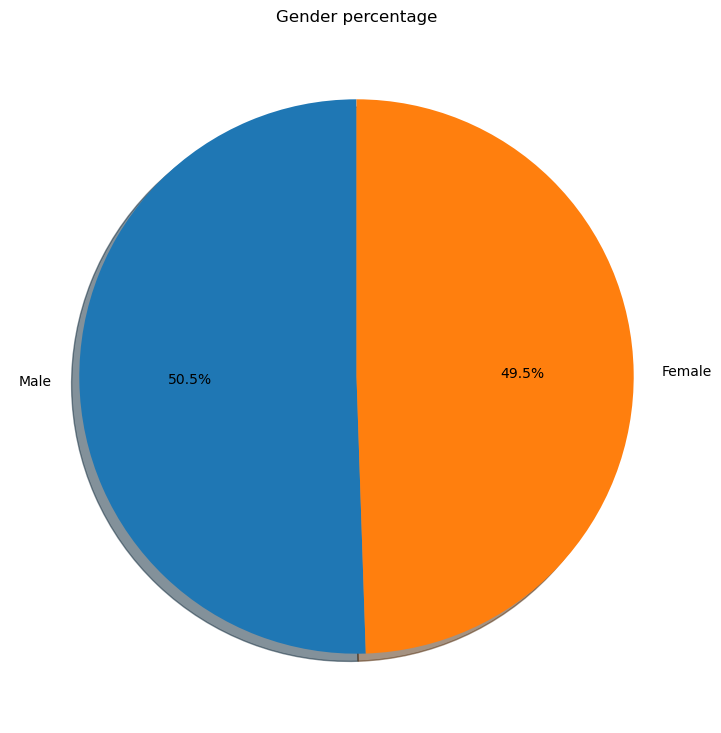

In [128]:
plt.rcParams["figure.figsize"]=[9,9]
donnees=lifestyle['Gender'].value_counts()
plt.pie(donnees.values, labels=donnees.index, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Gender percentage")
plt.show()

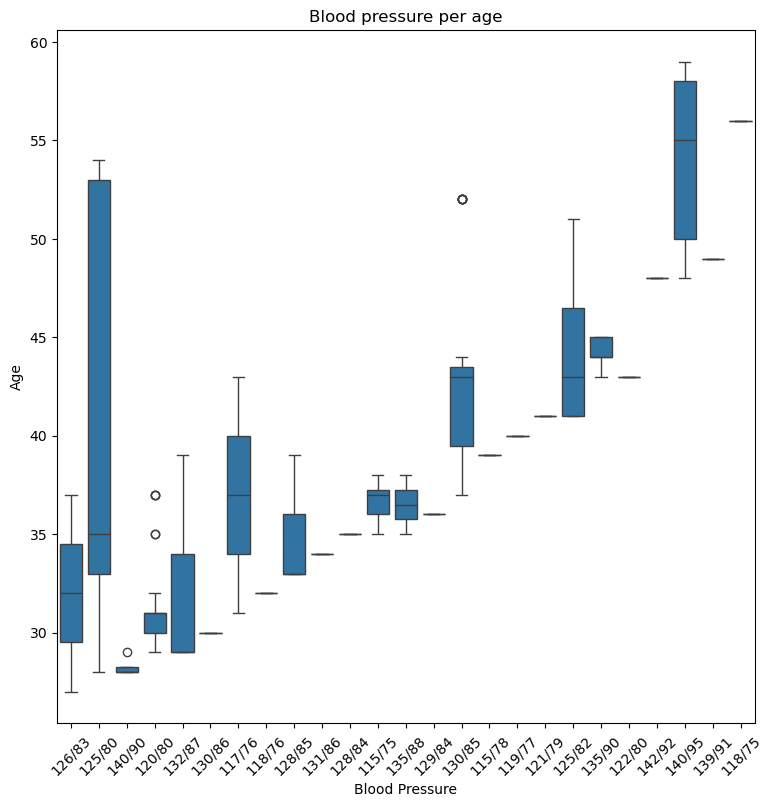

In [129]:
plt.rcParams["figure.figsize"]=[9,9]
lifestyle["Blood Pressure"].unique()
sns.boxplot(data=lifestyle, x="Blood Pressure", y="Age")
plt.xticks(rotation=45)
plt.title("Blood pressure per age")
plt.show()

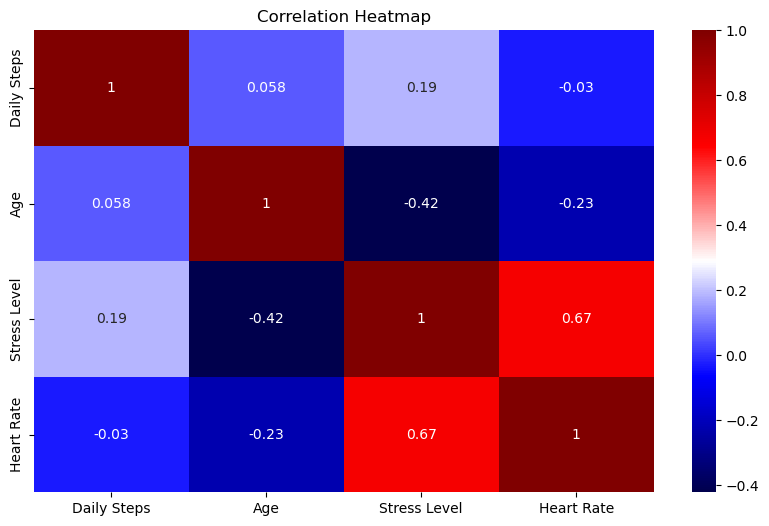

In [130]:
cor=lifestyle[["Daily Steps", "Age","Stress Level","Heart Rate"]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True, cmap="seismic")
plt.title("Correlation Heatmap")
plt.savefig("../outputs/graphs/correlation_heatmap.png")
plt.show()


/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/167611641.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/167611641.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age Group")


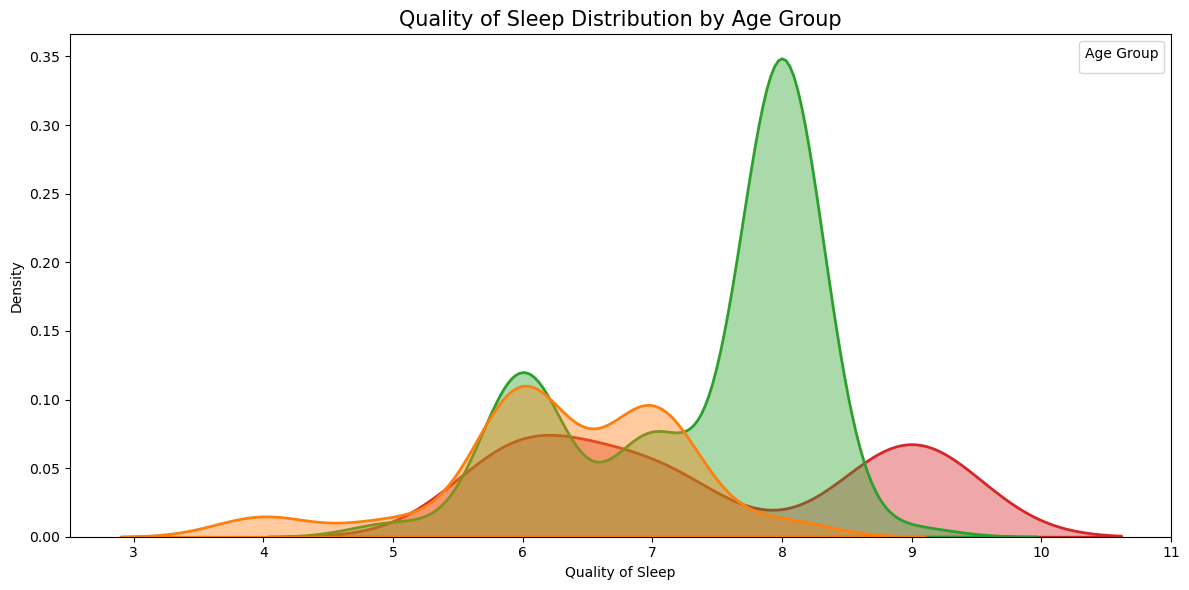

In [131]:
bins = [15, 25, 35, 45, 55, 65]
labels = ["15-25", "26-35", "36-45", "46-55", "56-65"]
lifestyle["Age Group"] = pd.cut(lifestyle["Age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12,6))
sns.kdeplot(
    data=lifestyle,
    x="Quality of Sleep",
    hue="Age Group",
    fill=True,
    alpha=0.4,
    linewidth=2
)
plt.title("Quality of Sleep Distribution by Age Group", fontsize=15)
plt.xlabel("Quality of Sleep")
plt.ylabel("Density")
plt.legend(title="Age Group")
plt.tight_layout()
plt.savefig("../outputs/graphs/sleep_quality_by_age_group.png")
plt.show()



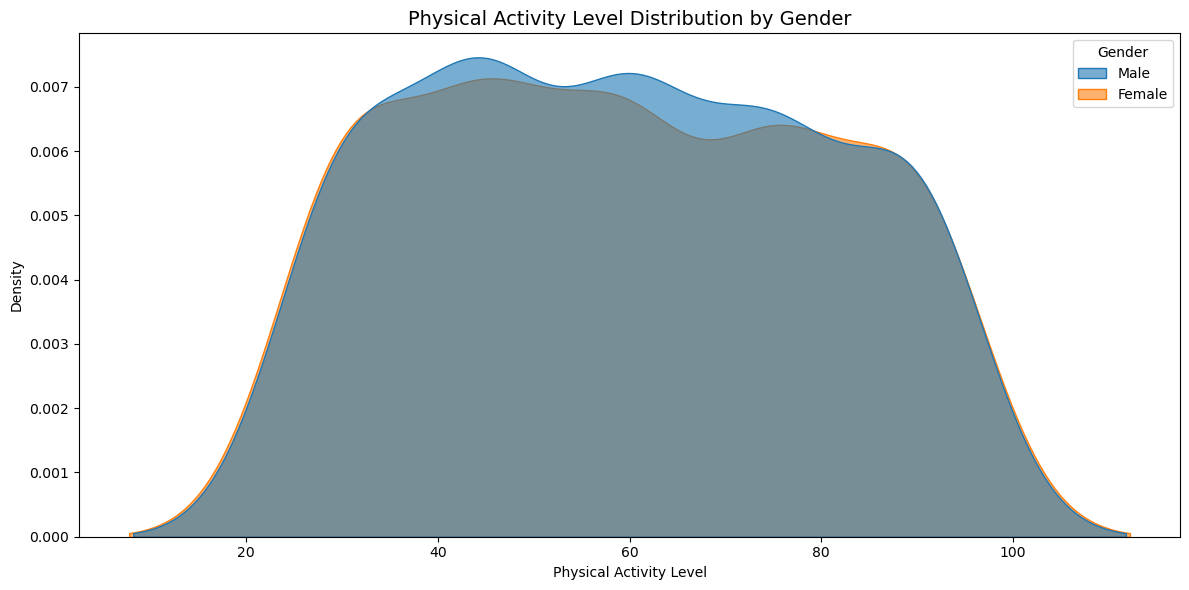

In [132]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=lifestyle, x="Physical Activity Level", hue="Gender", fill=True, alpha=0.6)
plt.title("Physical Activity Level Distribution by Gender", fontsize=14)
plt.xlabel("Physical Activity Level")
plt.tight_layout()
plt.show()


/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/1599006823.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


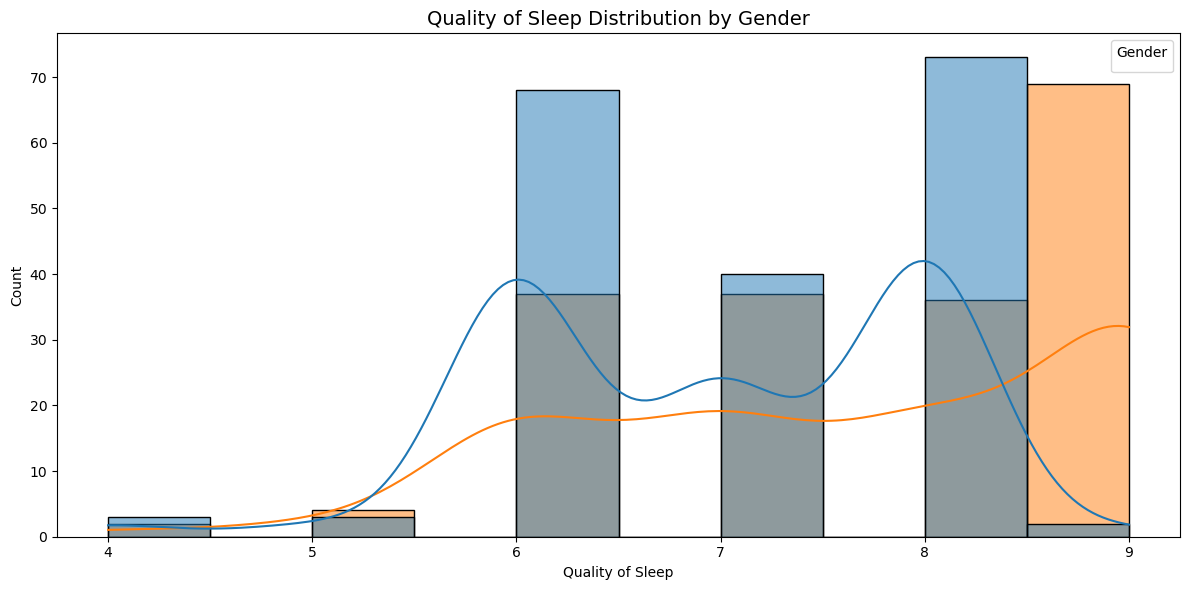

In [133]:
plt.figure(figsize=(12,6))
sns.histplot(data=lifestyle, x="Quality of Sleep", hue="Gender", kde=True, multiple="layer")
plt.title("Quality of Sleep Distribution by Gender", fontsize=14)
plt.xlabel("Quality of Sleep")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


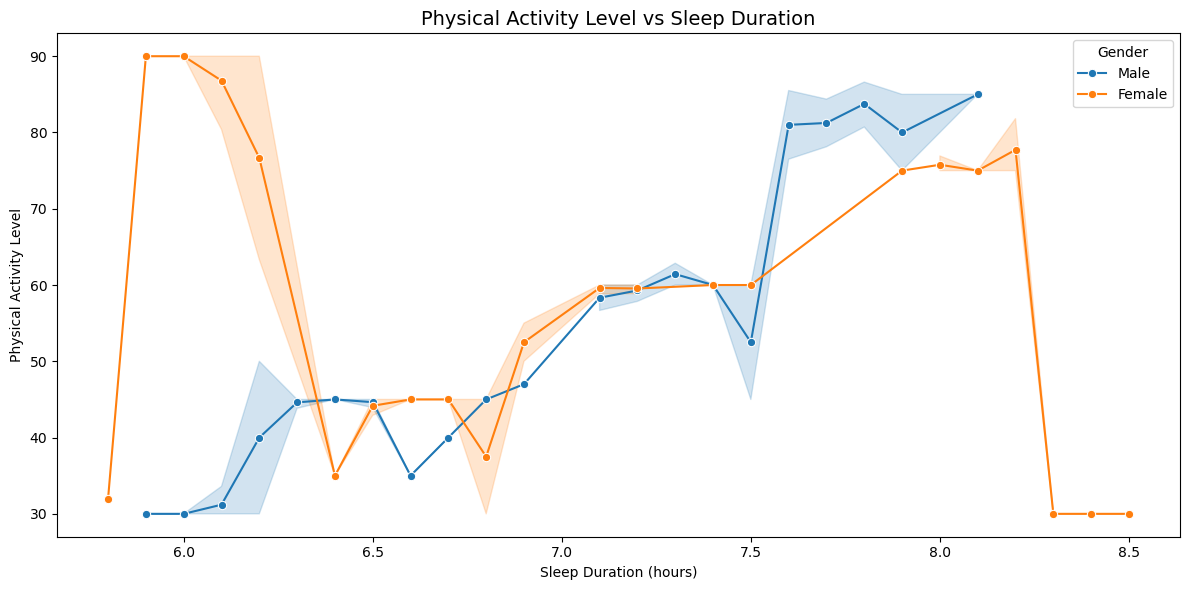

In [134]:
plt.figure(figsize=(12,6))
sns.lineplot(data=lifestyle, x="Sleep Duration", y="Physical Activity Level", hue="Gender", marker="o")
plt.title("Physical Activity Level vs Sleep Duration", fontsize=14)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Physical Activity Level")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


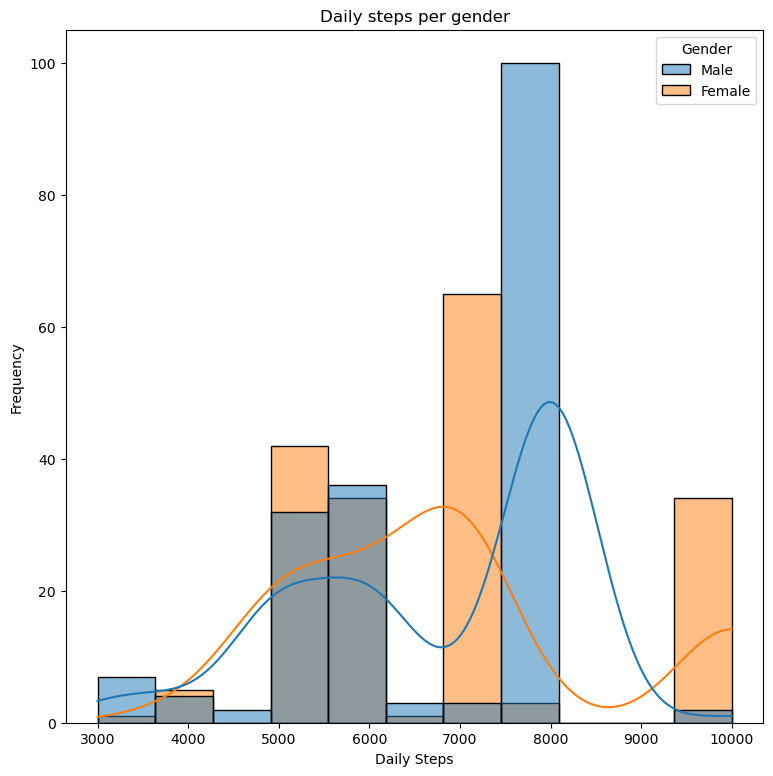

In [135]:
plt.title("Daily steps per gender")
plt.ylabel("Frequency")
sns.histplot(data=lifestyle, x="Daily Steps", hue="Gender", kde=True)
plt.show()

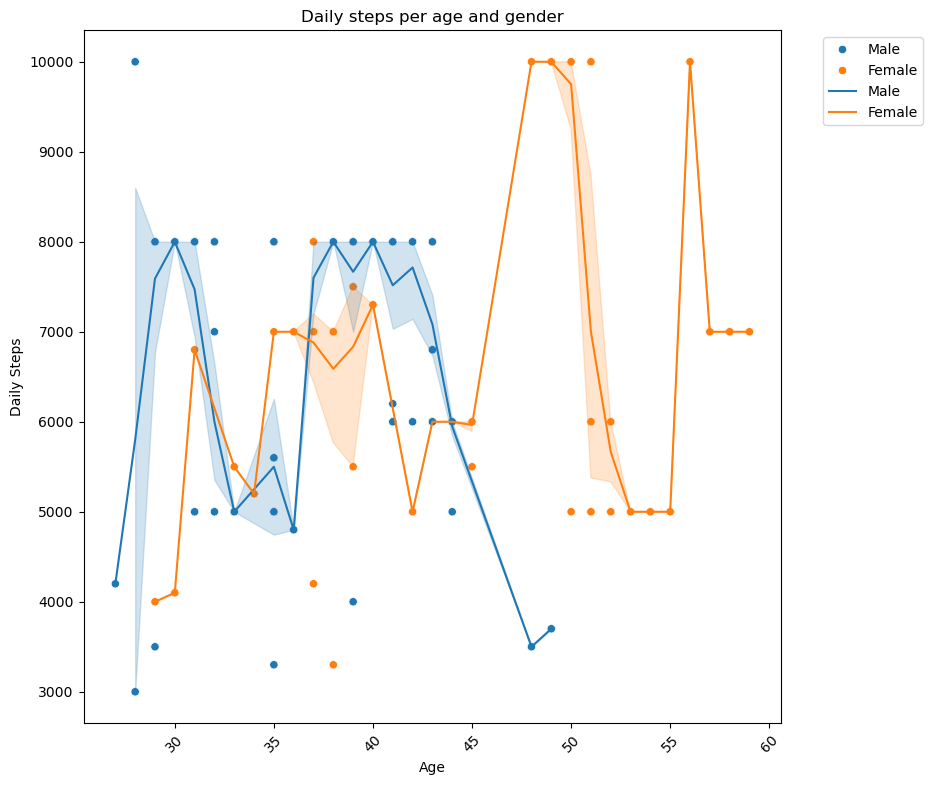

In [136]:
sns.scatterplot(data=lifestyle, x="Age", y="Daily Steps", hue="Gender")
sns.lineplot(data=lifestyle, x="Age", y="Daily Steps", hue="Gender", markers=False)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title("Daily steps per age and gender")
plt.show()

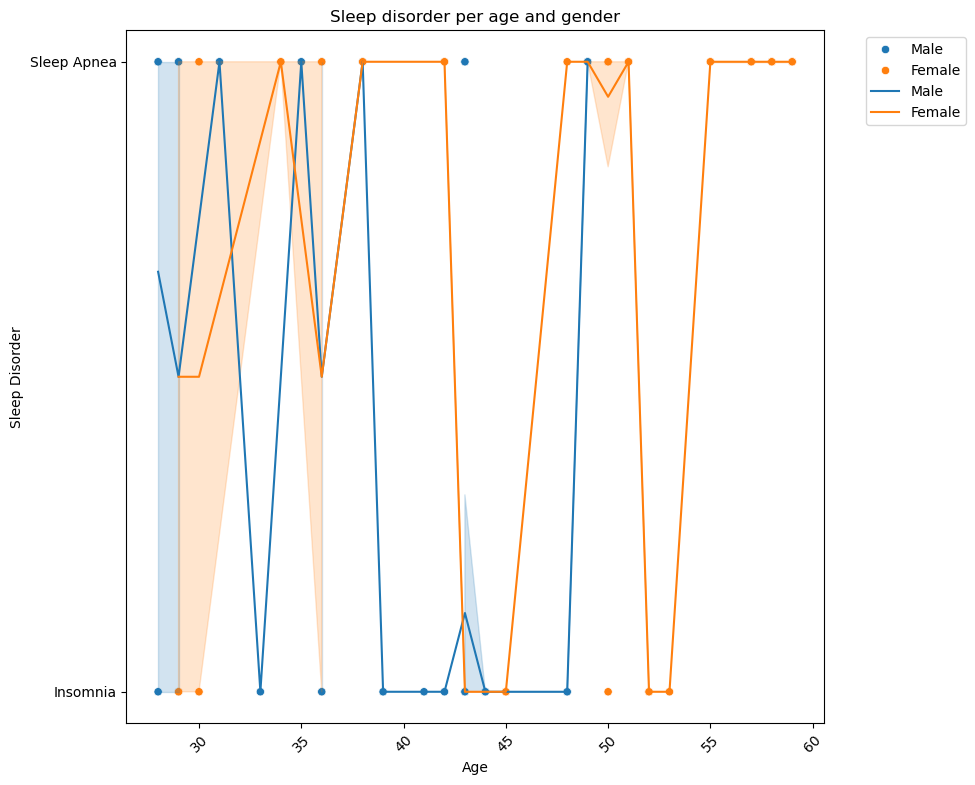

In [137]:
sns.scatterplot(data=lifestyle, x="Age", y="Sleep Disorder", hue="Gender")
sns.lineplot(data=lifestyle, x="Age", y="Sleep Disorder", hue="Gender", markers=False)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title("Sleep disorder per age and gender")
plt.show()

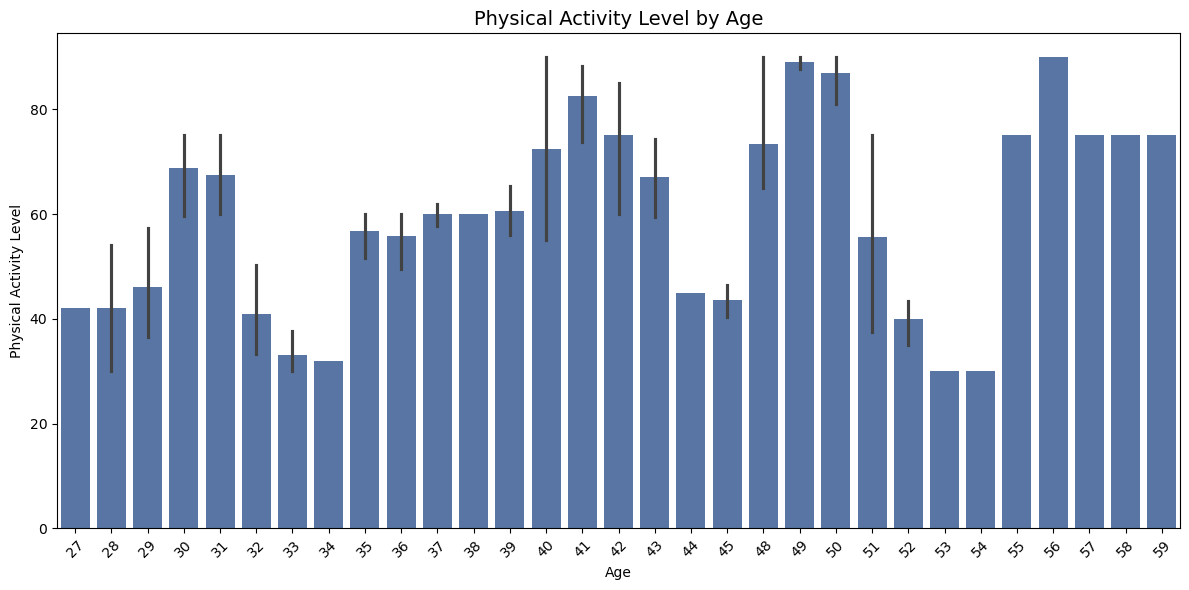

In [138]:
plt.figure(figsize=(12,6))
sns.barplot(data=lifestyle, x="Age", y="Physical Activity Level", color="#4C72B0")
plt.title("Physical Activity Level by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Physical Activity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/r8/k96sg_qj0hl_sng_4mxjv1cw0000gn/T/ipykernel_88138/1727846089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lifestyle, x="Occupation", y="Stress Level", palette="muted")


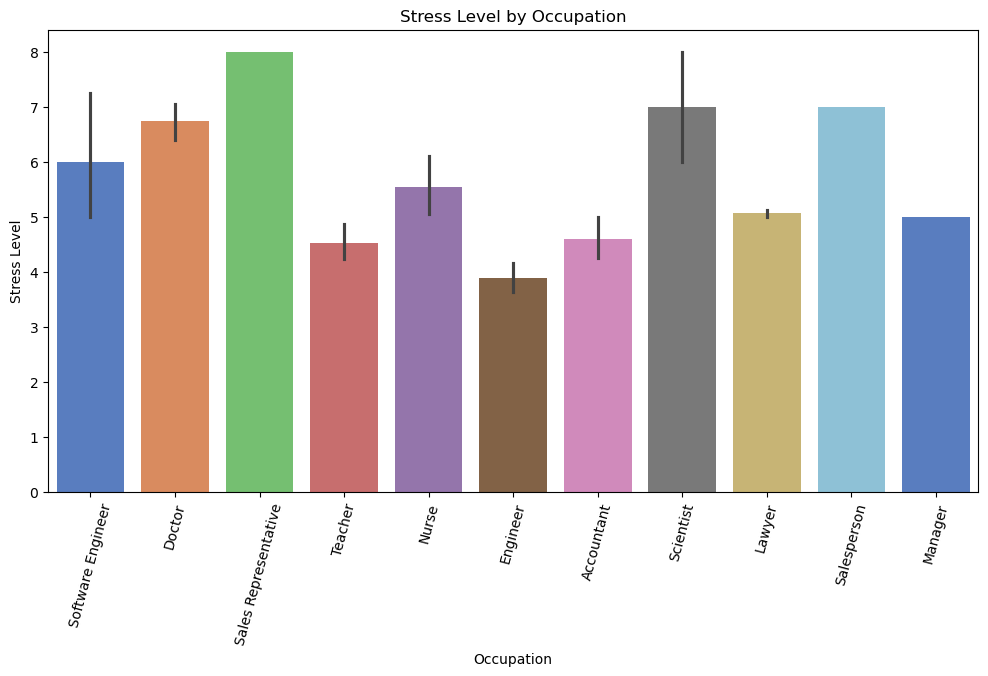

In [139]:
plt.figure(figsize=(12,6))
sns.barplot(data=lifestyle, x="Occupation", y="Stress Level", palette="muted")
plt.xticks(rotation=75)
plt.title("Stress Level by Occupation")
plt.savefig("../outputs/graphs/stress_by_occupation.png")
plt.show()


##  Conclusion

- Les individus ayant un **haut niveau de stress** dorment **moins longtemps**.
- L’**activité physique régulière** est associée à une **meilleure qualité du sommeil**.
- Les **troubles du sommeil** impactent négativement :
  - la durée du sommeil
  - la santé cardiovasculaire (rythme cardiaque)
- Le **genre** influence certains indicateurs de santé, mais **l’hygiène de vie** joue un rôle beaucoup plus important.

###  Insight clé :
Le sommeil n’est pas seulement une question d’heures, mais de **qualité du mode de vie**.

